<a href="https://colab.research.google.com/github/bomnism/DA/blob/main/da18_jason.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JSON
 * JSON(JavaScript Object Notations: 자바 스크립트 객체 표현법 
 * `{key1: value1, key2: value2, ...}` 형식의 문자열(dict)
 * Python의 `dict` 클래스 객체의 문자열 표현과 비슷 
 * `json` 모듈 JSON 형식 문자열(str) <----> dict 타입의 객체(object) 
    * json.dumps(obj): Python 객체 obj를 JSON 형식의 문자열로 변환(serialize, 직렬화)해서   문자열을 리턴
    * json.loads(s): JSON 형식의 문자열 s를 Python 객체로 변환(deserialize, 역직렬화)해서 변환된 파이썬 객체를 리턴. 
    * json.dump(obj, fp): Python 객체 obj를 JSON형식의 문자열로 변환해서 파일 fp에 씀(write)
    * json.load(fp): 파일 fp에서 JSON 형식의 문자열을 읽어서 Python 객체로 변환해서, 변환된 객체를 리턴. 

In [2]:
import json     # JSON 읽기/쓰기 기능을 가지고 있는 파이썬 기본 모듈
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# json.dumps(obj): Python object ---> JSON formatted string (Serialize, 직렬화) 
person = {'name' : '홍길동', 
                    'age' : 16, 
                    'phones' : ['02-1111-2222', '010-3333-4444']}

In [4]:
person

{'age': 16, 'name': '홍길동', 'phones': ['02-1111-2222', '010-3333-4444']}

In [5]:
type(person)

dict

In [6]:
person_json = json.dumps(person)
person_json

'{"name": "\\ud64d\\uae38\\ub3d9", "age": 16, "phones": ["02-1111-2222", "010-3333-4444"]}'

In [7]:
#  json.loads(s): JSON formatted string ---> Python object ( Deseriablize, 역직렬화)
result = json.loads(person_json)
result

{'age': 16, 'name': '홍길동', 'phones': ['02-1111-2222', '010-3333-4444']}

In [8]:
type(result)

dict

JSON 쓰기/읽기

In [9]:
with open('gildong.json', mode='w') as f :      # 파일을 텍스트 쓰기 모드(wt)로 오픈
    f.write(person_json)     # 문자열을 파일에 씀 
# with ~ as 구문 종료 후 f.close() 자동 호출됨. 

In [10]:
with open('gildong.json', mode='r') as f:       # 파일을 텍스트 읽기(rt) 모드로 오픈 
    line = f.readline()    # 파일에서 첫번쨰 줄을 읽음 
    print(line)      # 파일에서 읽은 JSON 포맷의 문자열
    gildong = json.loads(line)    # string ---> dict : deserialize
    print(type(gildong))
    print(gildong)

{"name": "\ud64d\uae38\ub3d9", "age": 16, "phones": ["02-1111-2222", "010-3333-4444"]}
<class 'dict'>
{'name': '홍길동', 'age': 16, 'phones': ['02-1111-2222', '010-3333-4444']}


In [11]:
# JSON 포맷의 문자열이 한줄씩 저장된 파일 
with open('movies.json', mode='w') as f:
    # dict 객체 생성
    movie1 = {'mid' : 1, 'title' : '모가디슈', 'genre' : 'action'}
    movie2 = {'mid' : 2, 'title' : 'black widow'}
    movie3 = {'mid' : 3, 'title' : '씽크홀', 'genre' : 'comedy'}

    # dict --->  JSON 포맷의 문자열로 변환
    m1_s = json.dumps(movie1)
    m2_s = json.dumps(movie2)
    m3_s = json.dumps(movie3)
    # 3개의 문자열을 한줄씩 파일에 write
    f.write(m1_s + '\n')     #  '\n' : new line(줄바꿈)
    f.write(m2_s + '\n')
    f.write(m3_s + '\n')

In [12]:
# 파일에서 한줄씩 읽으면서 dict객체로 변환하고 리스트에 추가 
movies = []    # 한줄씩 읽은 변환한 객체를 저장할 리스트 
with open('movies.json', mode='r') as f:      # 파일을 텍스트 읽기(rt) 모드로 open
        for line in f:    # 파일에서 한줄씩 읽으면서 반복 
            # print(line)
            m = json.loads(line.strip())        # json formatted string ---> dict   / strip : 앞뒤 공백 제거 
            movies.append(m)     # dict 객체를 리스트에 추가 

movies     #> dict 객체를 아이템으로 갖는 리스트 

[{'genre': 'action', 'mid': 1, 'title': '모가디슈'},
 {'mid': 2, 'title': 'black widow'},
 {'genre': 'comedy', 'mid': 3, 'title': '씽크홀'}]

In [13]:
# list comprehension
with open('movies.json', mode='r') as f: 
    movies_2= [json.loads(s) for s in f]
movies_2

[{'genre': 'action', 'mid': 1, 'title': '모가디슈'},
 {'mid': 2, 'title': 'black widow'},
 {'genre': 'comedy', 'mid': 3, 'title': '씽크홀'}]

In [14]:
movies_df = pd.DataFrame(movies)

In [15]:
movies_df

,mid,title,genre
0,1,모가디슈,action
1,2,black widow,NaN
2,3,씽크홀,comedy


# bitly 데이터셋 

* https://github.com/wesm/pydata-book/blob/2nd-edition/datasets/bitly_usagov/example.txt 파일을 다운로드 
* 다운로드한 파일을 Colab 세션 저장소에 업로드
* 업로드한 파일을 읽기 모드로 오픈 
* 파일의 첫번째 줄부터 마지막 줄까지 한줄씩 읽으면서 반복 
    * 읽은 JSON 포맷의 문자열을 dict 타입 객체로 변환하고 리스트에 추가 (append) 
* 파일의 내용이 모두 append된 리스트를 DataFrame으로 생성 
* 데이터 분석

In [27]:
# 업로드한 파일을 읽고 리스트에 데이터들을 추가
with open(file='example.txt', mode='r') as f:
    # readline ---> JSON formatted string ---> dict ---> append
    records = [json.loads(s.strip()) for s in f]

In [29]:
df = pd.DataFrame(records)

In [30]:
df.info()
#>JSON(반정형 데이터) 데이터들은 Datarame(정형 데이터)으로 변환하면 보통 NA들이 많이 생기게 됨.
#> dict의 key는 DataFrame의 컬럼 이름으로 변환 
#> dict의 value는 해당 컬럼의 값으로 변환


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

## 사용자 접속 지역(시간대, timezone) 분석 

* tz에는 몇 개의 시간대? 
* 사용자가 가장 많이 접속한 지역(시간대)?

In [31]:
df['tz']

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

In [37]:
df_clean = df.copy()

In [34]:
df['tz'].value_counts()

America/New_York             1251
                              521
America/Chicago               400
America/Los_Angeles           382
America/Denver                191
                             ... 
America/Monterrey               1
America/Argentina/Cordoba       1
America/Lima                    1
Europe/Skopje                   1
Africa/Lusaka                   1
Name: tz, Length: 97, dtype: int64

In [38]:
# tz 컬럼의 NA 값들을 'Missng' 문자열로 대체
df_clean['tz'] = df_clean['tz'].fillna('Missing')

In [39]:
df_clean['tz'].value_counts()

America/New_York         1251
                          521
America/Chicago           400
America/Los_Angeles       382
America/Denver            191
                         ... 
America/La_Paz              1
Europe/Volgograd            1
America/Monterrey           1
Asia/Yekaterinburg          1
America/Santo_Domingo       1
Name: tz, Length: 98, dtype: int64

In [35]:
# 데이터 가공(Cleaning) 하기 위한 복사본을 만듦
df_claen = df.copy()

In [ ]:
# tz 컬럼의 NA값들을 Missing 문자본을 만듦. 
df clin.loc[{df_Clean, tz }]f

In [40]:
# 사용자들이 가장 많이 접속한 시간대(timezone) 상위 10개를 시각화
top10_tz = df_clean['tz'].value_counts().head(n=10)
top10_tz

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [41]:
df_clean['tz'].value_counts().tail(n=10)
top10_tz

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [44]:
# 한국 서울 시간대(Asia/Seoul)가 데이터 프레임에 등장할까? 
df_clean[df_clean.tz == 'Asia/Seoul']
df_clean[df_clean.tz.str.lower().str.contains('seoul')]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
1428,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,KR,1.0,Asia/Seoul,11,y7mqmw,w41aUb,rebroth,"en-US,en;q=0.8",1.usa.gov,http://t.co/l16apDbA,http://apod.nasa.gov/apod/ap120314.html,1.331925e+09,1.331739e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3154,Mozilla/5.0 (iPad; U; CPU iPhone OS 5_0_1 like...,KR,0.0,Asia/Seoul,11,wcndER,zkpJBR,bnjacobs,ko-kr,1.usa.gov,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331926e+09,1.331923e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3175,Mozilla/5.0 (iPad; U; CPU iPhone OS 5_0_1 like...,KR,1.0,Asia/Seoul,11,wcndER,zkpJBR,bnjacobs,ko-kr,1.usa.gov,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331926e+09,1.331923e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3496,Mozilla/5.0 (iPhone; CPU iPhone OS 5_0_1 like ...,KR,0.0,Asia/Seoul,11,wQacbF,AsWr9f,addthis,en-us,1.usa.gov,https://twitter.com/whitehouse/status/18067782...,http://www.whitehouse.gov/energy/gasprices#.T2...,1.331927e+09,1.331912e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN
3506,Mozilla/5.0 (iPhone; CPU iPhone OS 5_0_1 like ...,KR,0.0,Asia/Seoul,11,wQacbF,AsWr9f,addthis,en-us,1.usa.gov,direct,http://www.whitehouse.gov/energy/gasprices#.T2...,1.331927e+09,1.331912e+09,Seoul,"[37.566399, 126.999702]",NaN,NaN


# 사용자 접속 국가(c) 분석
* 가장 많이 접속한 국가 상위 10개 시각화 

In [45]:
df_clean['c'] = df_clean['c'].fillna('Missing')     #NA를 'Missing'으로 대체 
df_clean.loc[df_clean.c == ' ', 'c']  = 'Unknown'  # 빈 문자열(' ')을 'Unknown'으로 대체 

In [47]:
df[df.tz == ' ']

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw


In [48]:
top10_country = df_clean['c'].value_counts().head(n=10)

In [49]:
top10_country

US         2305
Missing     641
GB           74
CA           60
JP           37
ES           37
BR           35
DE           28
IT           27
NL           22
Name: c, dtype: int64

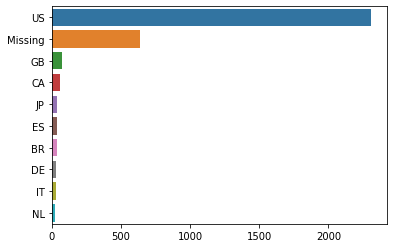

In [50]:
sns.barplot(x=top10_country.values, y = top10_country.index)
plt.show()

In [54]:
# 미국과 NA(Missing)를 제외한 상위 10개 국가 
top10_country2 = df_clean['c'].value_counts().iloc[2:12]

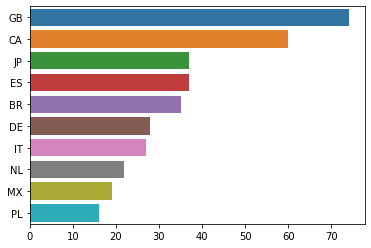

In [55]:
sns.barplot(x = top10_country2.values, y = top10_country2.index)

# 사용자 접속 환경(OS)분석
    * 데이터프레임의 a컬럼의 문자열을 분석하면 OS정보를 일부 알 수 있음. 

NA 처리 방법: 
    * NA를 다른 값으로 대체 
        * 평균값 대체, 중앙값 대체, 특정값(예:0) 대체
        * 이전 행의 값으로 대체, 다음 행의 값으로 대체 

    * NA가 포함된 행(row)을 삭제
        * NA가 많지 않은 경우에(행들에 삭제해도 경향이 많이 바뀌지 않을 때) 

In [56]:
# 'a' 컬럼이 NA인 행들을 모두 삭제  'a' 컬럼의 값이 NA가 아닌 행들을 선택
df_clean = df_clean[df_clean.a.notnull()]      # isnull 반대개념 


* `pd.Series.isnull()` : 
        * null(NA)인 위치를 찾아주는 메서드 
        * Series의 값이 null(NA)이면 True, 아니면 False 리턴하는 메서드.
* `pd.Series.notnull()` : Series의 값이 null(NA)가 아니면 True, null이면 False를 리턴하는 메서드.

In [57]:
 df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            3440 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  0 non-null      float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 510.6+ K

## 'os' 파생변수를 추가 

* 'a' 컬럼의 문자열이 'Windows'를 포함하면, Windows
* 'a' 컬럼의 문자열이 'Windows'를 포함하지 않으면, Other

In [59]:
# 'os' 파생변수를 추가 
df_clean['os'] = np.where(df_clean.a.str.contains('Windows'), 'Windows', 'Other')

In [60]:
df_clean[['a', 'os']].head()

,a,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Windows
1,GoogleMaps/RochesterNY,Other
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,Other
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Windows


In [61]:
df_clean['os'].value_counts()

Windows    2246
Other      1194
Name: os, dtype: int64

## 사용자 시간대(timezone)별, 운영체제(OS)별 빈도수, 상위 10개 시각화 

In [62]:
df_clean.groupby(['tz', 'os']).size()

tz                 os     
                   Other      245
                   Windows    276
Africa/Cairo       Windows      3
Africa/Casablanca  Windows      1
Africa/Ceuta       Windows      2
                             ... 
Europe/Warsaw      Windows     15
Europe/Zurich      Other        4
Pacific/Auckland   Other        3
                   Windows      8
Pacific/Honolulu   Windows     36
Length: 149, dtype: int64

In [64]:
# unstack: Series에서 인덱스의 값을 컬럼 이름으로 변환. long ---> wide
df_clean.groupby(['tz', 'os']).size().unstack()

os,Other,Windows
tz,,
,245.0,276.0
Africa/Cairo,NaN,3.0
Africa/Casablanca,NaN,1.0
Africa/Ceuta,NaN,2.0
Africa/Johannesburg,NaN,1.0
...,...,...
Europe/Volgograd,NaN,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,NaN


In [66]:
# unstack 과정에서 NA들이 생기게 됨 ---> NA를 0으로 대체 
tz_os_counts = df_clean.groupby(['tz', 'os']).size().unstack().fillna(0)
tz_os_counts

os,Other,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [67]:
#  전체(Windows+Other) 접속자 수의 상위 10개 ---> 파생 변수 
tz_os_counts['Total'] = tz_os_counts['Other'] + tz_os_counts['Windows']
tz_os_counts

os,Other,Windows,Total
tz,,,
,245.0,276.0,521.0
Africa/Cairo,0.0,3.0,3.0
Africa/Casablanca,0.0,1.0,1.0
Africa/Ceuta,0.0,2.0,2.0
Africa/Johannesburg,0.0,1.0,1.0
...,...,...,...
Europe/Volgograd,0.0,1.0,1.0
Europe/Warsaw,1.0,15.0,16.0
Europe/Zurich,4.0,0.0,4.0


In [68]:
tz_os_counts.sort_values(by = 'Total')

os,Other,Windows,Total
tz,,,
America/Mazatlan,1.0,0.0,1.0
America/La_Paz,0.0,1.0,1.0
America/Lima,0.0,1.0,1.0
Europe/Volgograd,0.0,1.0,1.0
Europe/Sofia,0.0,1.0,1.0
...,...,...,...
America/Denver,132.0,59.0,191.0
America/Los_Angeles,130.0,252.0,382.0
America/Chicago,115.0,285.0,400.0


In [70]:
top10 = tz_os_counts.sort_values(by = 'Total', ascending=False).head(n=10)

In [71]:
top10

os,Other,Windows,Total
tz,,,
America/New_York,339.0,912.0,1251.0
,245.0,276.0,521.0
America/Chicago,115.0,285.0,400.0
America/Los_Angeles,130.0,252.0,382.0
America/Denver,132.0,59.0,191.0
Europe/London,43.0,31.0,74.0
Asia/Tokyo,2.0,35.0,37.0
Pacific/Honolulu,0.0,36.0,36.0
Europe/Madrid,16.0,19.0,35.0
